<a href="https://colab.research.google.com/github/aliu-7/Molecular-Property-Prediction-and-Optimization/blob/main/4_3_3_Training_and_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Run 4.2.2 Code

In [ ]:
!pip install -q rdkit pandas scikit-learn
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load BBBP dataset from GitHub
url = "https://raw.githubusercontent.com/Data-Chemist-Handbook/Data-Chemist-Handbook.github.io/refs/heads/master/_pages/BBBP.csv"
data = pd.read_csv(url)
data.head()

# Step 4: Feature Extraction with RDKit (safe handling)
def compute_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return {
            'MolWt': Descriptors.MolWt(mol),
            'LogP': Descriptors.MolLogP(mol),
            'NumHDonors': Descriptors.NumHDonors(mol),
            'NumHAcceptors': Descriptors.NumHAcceptors(mol),
            'TPSA': Descriptors.TPSA(mol),
            'NumRotatableBonds': Descriptors.NumRotatableBonds(mol)
        }
    else:
        return None

# Apply descriptor function
descriptor_data = data['smiles'].apply(compute_descriptors)

# Filter out failed SMILES rows
valid_mask = descriptor_data.notnull()
df_desc = pd.DataFrame(descriptor_data[valid_mask].tolist())
df_desc['Label'] = data['p_np'][valid_mask].values

# Split into input features and labels
X = df_desc.drop('Label', axis=1)
y = df_desc['Label']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

[23:06:08] Explicit valence for atom # 1 N, 4, is greater than permitted
[23:06:08] WARNING: not removing hydrogen atom without neighbors
[23:06:08] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:06:08] WARNING: not removing hydrogen atom without neighbors
[23:06:08] WARNING: not removing hydrogen atom without neighbors
[23:06:08] WARNING: not removing hydrogen atom without neighbors
[23:06:08] WARNING: not removing hydrogen atom without neighbors
[23:06:08] WARNING: not removing hydrogen atom without neighbors
[23:06:08] WARNING: not removing hydrogen atom without neighbors
[23:06:08] Explicit valence for atom # 6 N, 4, is greater than permitted
[23:06:08] WARNING: not removing hydrogen atom without neighbors
[23:06:08] WARNING: not removing hydrogen atom without neighbors
[23:06:08] WARNING: not removing hydrogen atom without neighbors
[23:06:08] WARNING: not removing hydrogen atom without neighbors
[23:06:08] Explicit valence for atom # 11 N, 4, is greater than pe

RandomForestClassifier(random_state=42)

# Step 1: Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming `df_desc` is your cleaned DataFrame from section 4.3.2
X = df_desc.drop(columns=['Label'])
y = df_desc['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train a Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Step 3: Make Predictions and Evaluate the Model


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8431372549019608

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.55      0.63        99
           1       0.87      0.94      0.90       309

    accuracy                           0.84       408
   macro avg       0.80      0.74      0.76       408
weighted avg       0.84      0.84      0.83       408



# Step 4: Interpret Feature Importance

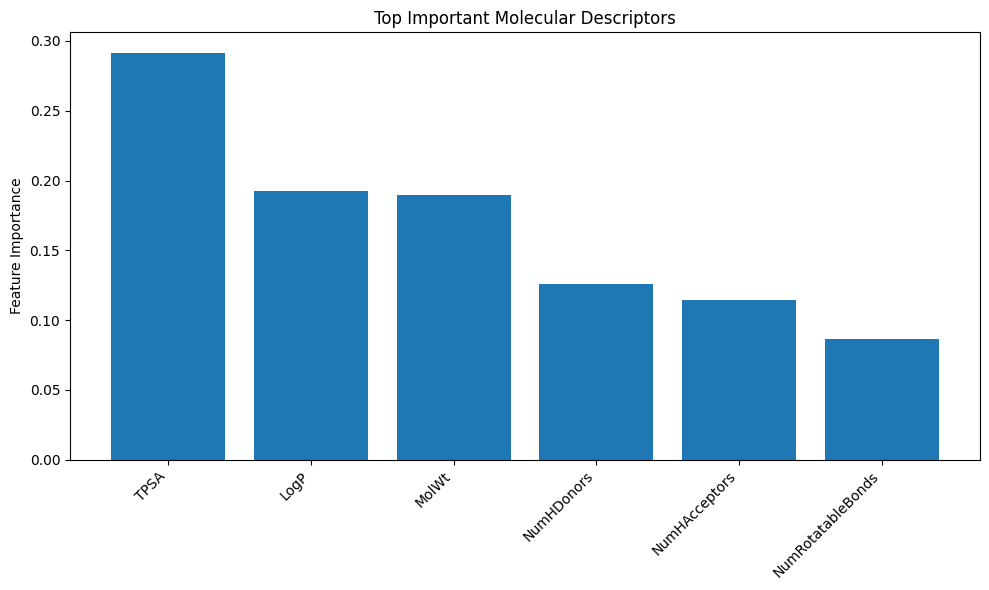

In [ ]:
# Sort and select top features
import numpy as np
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
feature_names = df_desc.drop(columns=['Label']).columns
indices = np.argsort(importances)[::-1]
top_n = min(10, len(importances))  # Use the smaller of 10 or actual feature count

# Plot
plt.figure(figsize=(10, 6))
plt.title("Top Important Molecular Descriptors")
plt.bar(range(top_n), importances[indices[:top_n]])
plt.xticks(range(top_n), feature_names[indices[:top_n]], rotation=45, ha='right')
plt.ylabel("Feature Importance")
plt.tight_layout()
plt.show()

# Practice Problem: **Evaluating Model Confidence**

**Task:**

1. Take 5 random test molecules from the dataset.
2. Print:

   * Their SMILES strings
   * The model’s binary prediction (0 or 1)
   * The model’s predicted probability (i.e. confidence level)

This helps you understand how confident the model is in its decisions—and whether those decisions seem reasonable.

In [ ]:
import numpy as np
import pandas as pd

# Access the indices from the test set
test_indices = X_test.index

# Recover corresponding SMILES strings from the original dataset
test_smiles = data.loc[test_indices, 'smiles']

# Sample 5 molecules
sampled = test_smiles.sample(5, random_state=1)

print("Random Test Samples:\n")
for idx in sampled.index:
    smiles = data.loc[idx, 'smiles']
    features = X.loc[idx].values.reshape(1, -1)

    pred = rf_model.predict(features)[0]
    prob = rf_model.predict_proba(features)[0][1]  # Probability of class 1

    print(f"SMILES: {smiles}")
    print(f"→ Predicted Label: {pred}")
    print(f"→ Predicted Probability (Confidence): {prob:.2f}\n")

Random Test Samples:

SMILES: [H+].C1=C(OCC(=O)NCCN(CC)CC)C=CC(=C1)OC.[Cl-]
→ Predicted Label: 1
→ Predicted Probability (Confidence): 0.88

SMILES: C1=C(Br)C=CC2=C1C(=NCC(N2C)COC)C3=CC=CC=C3Cl
→ Predicted Label: 1
→ Predicted Probability (Confidence): 1.00

SMILES: CC(C)c1ccc(C)cc1OCC2=NCCN2
→ Predicted Label: 1
→ Predicted Probability (Confidence): 0.56

SMILES: [C@@]125C3=C4C[C@H]([C@@]1(CC[C@@H]([C@@H]2OC3=C(C=C4)O)O)O)N(C)CC5
→ Predicted Label: 1
→ Predicted Probability (Confidence): 0.89

SMILES: CO\N=C(C(=O)NC1[C@H]2SCC(=C(N2C1=O)C(O)=O)\C=C/c3scnc3C)\c4csc(N)n4
→ Predicted Label: 0
→ Predicted Probability (Confidence): 0.41



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local